$\Large{\text{Energy A.I. Hackathon 2025 Workflow}} \newline \normalsize{\textit{- "For Hire"}}$

$\normalsize{\textbf{Authors: Denys Osmak, Noe Davila-Vega, Lisa Byeon, Artem Shevchenko, Nurali Bibolat}}$

$\normalsize{\text{- The University of Texas at Austin, Austin, Texas, USA}}$

$\LARGE{\text{Executive Summary}}$

1. We were tasked to analyze and utilize various independent variables, in order to predict the energy usage from Grid, Diesel, and CNG source
2. We utilized feature imputation, feature selection, and enumeration of categorical variables to prepare the dataset for machine learning techniques
3. XG boost, cat boost, 

$\LARGE{\text{Workflow Goals}}$

$$\begin{enumerate}
    \item{write down the workflow steps}
\end{enumerate}$$

In [84]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\denys\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\Users\denys\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Users\denys\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Users\denys\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Users\denys\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self

  Obtaining dependency information for scikit-learn==1.5.2 from https://files.pythonhosted.org/packages/45/05/74e453853c0b1b0773f46027848a17467f5dc9c5f15d096d911163d27550/scikit_learn-1.5.2-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 11.0/11.0 MB 4.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import mutual_info_regression


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

$\LARGE{\text{Load Data}}$

$\text{Our workflow utilizes the following .csv file 'HackathonData2025.csv' which includes 1082 unique horizontal drilling} \newline \text{and hydraulic fracturing locations. The dataset includes various data about the operation of each location, specifically it includes } \newline \text{the amount of energy consumed by different energy sources which will act as our target variables we attempt to predict.}$

$\Large{\text{Numerical input features:}} \newline \quad \large{\text{1. #Stages - number of stages used within the operation}} \newline \quad \large{\text{2. #Clusters - number of clusters initiated within the operation}} \newline \quad \large{\text{3. Estimated Average Stage Time (mins) - estimated average time to complete one stage of operation}} \newline \quad \large{\text{4. Actual Average Stage Time (mins) - actual average time to complete one stage of operation}} \newline \quad \large{\text{5. Ambient Temperature (F) - Temperature on the day of operation}}$

$\Large{\text{Categorical input features:}} \newline \quad \large{\text{6. Frac Fleet - Service company used for the operation}} \newline \quad \large{\text{7. Target Formation - formation of the well to be hydraulically fractured}} \newline \quad \large{\text{8. Field Area - indicator used to qualitatively describe the area of the field where the operation is performed}} \newline \quad \large{\text{9. Fuel Type - type of system used to power the operation}} \newline \quad \large{\text{10. Sand Provider - company that provided the sand to be used for the operation}}$

$\Large{\text{Target features:}} \newline \quad \large{\text{1. Grid (kWh) - amount of grid-based energy consumed by the operation}} \newline \quad \large{\text{2. Diesel (gal) - amount of diesel-based energy consumed by the operation}} \newline \quad \large{\text{3. CNG (MMBTU) - amount of compressed natural gas-based energy consumed by the operation}}$

$\LARGE{\text{Pre-processing Data}}$

$\Large{\text{1. Enumeration and feature imputation}}$

$\normalsize{\text{We enumerate the categorical data, kNN to interpolate the missing values, and introduce a new target feature}}$

$\text{(if have time, form a heat map to show that there aren't a lot of missing values and that kNN is justified)}$

In [3]:
#Enumeration and Imputation process
def enumerateAndImpute(filename, n_neighbors = 3):
    data = pd.read_csv(filename)

    #For the purposes of this model, the following categorical features will be enumerated: 'Frac Fleet', 'Fleet Type', 'Target Formation', 'Field Area', 'Sand Provider', 'fuel type'
    enumeratedData = data[data.columns.tolist()].replace({'SAND_C_X': 0,'SAND_C_R': 1, 'SAND_C_A': 2,'Turbine': 0, 'DGB': 1,'Diesel': 2, 'Grid': 3, 'West Campus' : 0,'Gregory Gym' : 1,'DKR' : 2,'The Tower': 3,'CPE': 4,'Moody Center': 5,'Guadalupe' : 6,'Turtle Pond': 7,'Pecan Tree': 0,'Bluebonnet' : 1,'Lone Star': 2,'Monarch Butterfly': 3, 'Rodeo' : 4,'Cowboy': 5,'Longhorn': 6,'Armadillo': 7, 'Magnolia' : 8, 'Taco' : 9, 'Chili' : 10, 'Zipper' : 0,'Simul' : 1})

    #The other types are a little easier to deal with:

    #Assigning a sequential marker [number] to each well... (As opposed to names)
    index = 0
    for i in range(len(enumeratedData)):
        enumeratedData.at[i, 'Well Name'] = index
        index += 1

    #Frac Fleet simply given it's second number...
    for i in range(len(enumeratedData)):
        split = enumeratedData.at[i, 'Frac Fleet'].split(' ')
        enumeratedData.at[i, 'Frac Fleet'] = split[1]
        
    #Mainly for testing...
    #enumeratedData.to_csv("outEnumerated.csv")
    
    enumeratedData = enumeratedData.astype(float)
    
    imputer = KNNImputer(n_neighbors = n_neighbors)
    
    empty_columns = enumeratedData.columns[enumeratedData.isnull().all()]
    print("Empty columns before imputation:", empty_columns)

    # Step 2: Remove empty columns from the DataFrame
    enumeratedData_no_empty = enumeratedData.dropna(axis=1, how='all')

    # Step 3: Apply KNN Imputation to the DataFrame without empty columns
    imputer = KNNImputer(n_neighbors=3)
    imputed_data = imputer.fit_transform(enumeratedData_no_empty)

    # Convert the imputed data back into a DataFrame with the original column names
    imputed_df = pd.DataFrame(imputed_data, columns=enumeratedData_no_empty.columns)

    # Step 4: Add back the empty columns (those with all missing values) into the imputed DataFrame
    # For empty columns, we can either leave them as NaN (if no imputation is possible) or fill them with some default value
    for col in empty_columns:
        imputed_df[col] = np.nan  # You can choose to fill with a default value, like 0 or the mean

    # Step 5: If desired, reorder columns to match the original DataFrame's order
    imputed_df = imputed_df[enumeratedData.columns]
    
    #print(imputed_df)

    #Now we can train the data on columns that DO NOT have missing data...
    # Round the "Fleet Type" column to the nearest integer or any number of decimals you prefer
    imputed_df['Fleet Type'] = imputed_df['Fleet Type'].round(0)  # rounds to the nearest integer

    # Step 2: Add a new column at the end filled with NaN values 
    imputed_df['Total_Energy_MMBTU'] = np.nan
    #imputed_df.to_csv(fileout)

    
    print("Done!")
    
    return imputed_df.copy()



In [4]:
# inputing the data from the file

my_data = enumerateAndImpute("HackathonData2025.csv")

Empty columns before imputation: Index([], dtype='object')
Done!


In [5]:
#Creating a new target feature 

#Conversion

kwh_to_mmbtu = 0.003412
diesel_to_mmbtu = 0.1387

#Convert each column to MMBTU (CNG)
my_data['Grid_MMBTU'] = my_data['Grid'] * kwh_to_mmbtu
my_data['Diesel_MMBTU'] = my_data['Diesel'] * diesel_to_mmbtu
my_data['CNG_MMBTU'] = my_data['CNG']

#Create the new target feature
my_data['Total_Energy_MMBTU'] = my_data['Grid_MMBTU'] + my_data['Diesel_MMBTU'] + my_data['CNG_MMBTU']
my_data = my_data.drop(columns=['Grid_MMBTU', 'Diesel_MMBTU', 'CNG_MMBTU'])


#Dropping certain features to reduce redundancy (dropped anyway later on)

my_data = my_data.drop(columns = ['Well Name', 'Grid', 'Diesel', 'CNG'])

In [6]:
my_data

,# Stages,# Clusters,Estimated Average Stage Time,Actual Average Stage Time,Frac Fleet,Fleet Type,Target Formation,Field Area,Ambient Temperature,Fuel Type,Sand Provider,Total_Energy_MMBTU
0,68.0,480.0,85.7,120.5,4.0,0.0,0.0,0.0,35.900000,0.0,0.0,22717.0000
1,68.0,431.0,85.7,117.6,4.0,0.0,0.0,0.0,35.900000,0.0,1.0,22717.0000
2,76.0,507.0,76.2,87.0,8.0,0.0,1.0,1.0,38.100000,1.0,1.0,23719.0926
3,76.0,565.0,76.2,87.3,8.0,0.0,2.0,1.0,38.100000,1.0,2.0,23593.7562
4,76.0,522.0,76.2,90.8,8.0,0.0,6.0,1.0,38.100000,1.0,0.0,24359.3033
...,...,...,...,...,...,...,...,...,...,...,...,...
1077,47.0,322.0,106.7,118.2,14.0,1.0,3.0,5.0,90.100000,2.0,0.0,9881.1267
1078,42.0,312.0,106.7,118.1,14.0,1.0,3.0,5.0,90.100000,2.0,1.0,9016.3322
1079,42.0,296.0,106.7,118.2,14.0,1.0,3.0,5.0,81.766667,2.0,0.0,9138.3882
1080,47.0,322.0,106.7,117.7,14.0,1.0,3.0,5.0,90.100000,2.0,2.0,10596.5413


$\Large{\text{2. Data Visualization}}$

$\large{\text{1) Correlation Matrix}} \newline \normalsize{\text{Pearson's Rank Correlation Coefficient is calculated between all pairs of input features} \newline \normalsize{\text{in order to find any two variables exhibiting mostly linear relationship (with some non-linear deviations)}}}$

Correlation Matrix:
                              # Stages  # Clusters   \
# Stages                      1.000000     0.956941   
# Clusters                    0.956941     1.000000   
Estimated Average Stage Time  0.034553     0.039231   
Actual Average Stage Time    -0.044886    -0.041593   
Frac Fleet                   -0.036113    -0.042061   
Fleet Type                    0.090487     0.095021   
Target Formation              0.022962     0.023985   
Field Area                   -0.041510    -0.027185   
Ambient Temperature           0.186344     0.178248   
Fuel Type                    -0.018509    -0.026439   
Sand Provider                 0.008876     0.010401   
Total_Energy_MMBTU            0.626748     0.600725   

                              Estimated Average Stage Time  \
# Stages                                          0.034553   
# Clusters                                        0.039231   
Estimated Average Stage Time                      1.000000   
Actual Average S

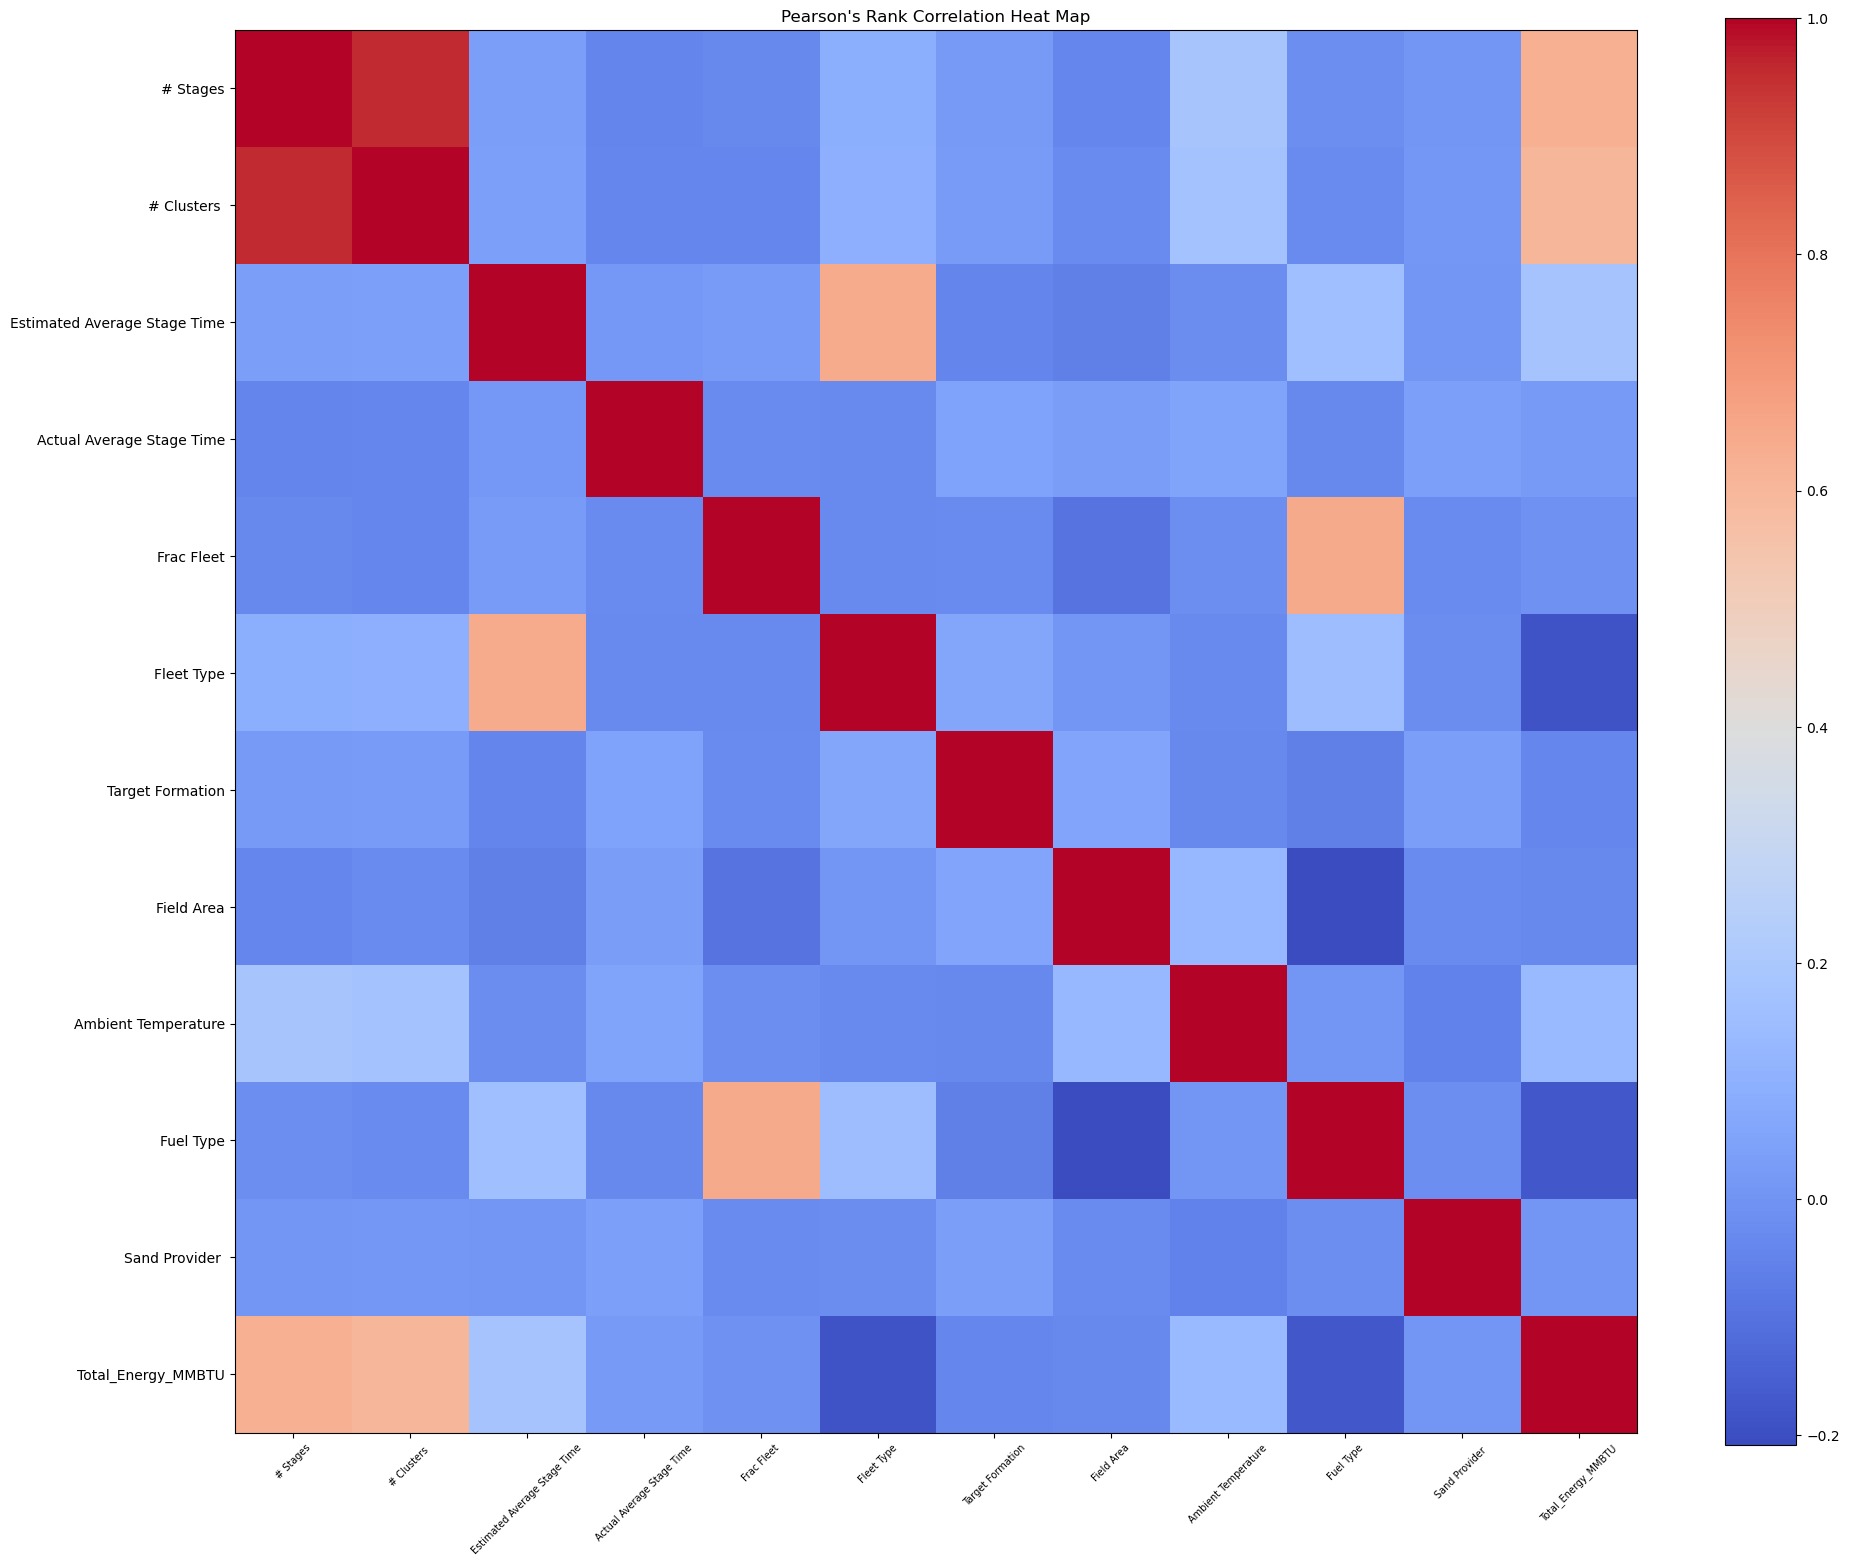

In [7]:

# Calculate the correlation matrix using Pearson method
correlationMatrix = my_data.corr(method='pearson')

# Print the correlation matrix
print("Correlation Matrix:")
print(correlationMatrix)

# Find the most correlated variables (excluding self-correlations)
# We will flatten the correlation matrix and filter out self-correlation
correlation_pairs = correlationMatrix.unstack()
correlation_pairs = correlation_pairs[correlation_pairs < 0.98]  # Exclude self-correlation (value of 1)

# Sort by absolute value of correlation and take the top N pairs
sorted_correlation_pairs = correlation_pairs.abs().sort_values(ascending=False)

# Print the most correlated variable pairs
print("\nMost Correlated Variable Pairs:")
top_n = 20  # You can change this value as needed
for idx, value in sorted_correlation_pairs.head(top_n).items():
    print(f"{idx[0]} and {idx[1]}: {value:.2f}")

# Plot the heatmap
plt.figure(figsize=(20, 16))
plt.imshow(correlationMatrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# X and Y axis will have column names, both same and mirrored
plt.title("Pearson's Rank Correlation Heat Map")
plt.xticks(np.arange(len(correlationMatrix)), correlationMatrix.columns, rotation=45, fontsize=7)
plt.yticks(np.arange(len(correlationMatrix)), correlationMatrix.columns)

plt.tight_layout()
plt.show()



$\normalsize{\text{Most correlated pairs of features are identified as potential candidates for feature removal}}$

$\large{\text{1.1) Correlation Matrix with Normalized values}}$

In [38]:


copy_data = my_data.copy()

minVals = copy_data[copy_data.columns.tolist()].min()
maxVals = copy_data[copy_data.columns.tolist()].max()

for column in copy_data.columns.tolist():

    for i in range(len(copy_data)):
        value = copy_data.at[i, column]
   # Check if the value is not NaN before applying the normalization
        if pd.notna(value):
            # Normalize the value using Min-Max formula
            copy_data.at[i, column] = (float(value) - float(minVals[column])) / (float(maxVals[column]) - float(minVals[column]))

In [41]:
import seaborn as sns
#Calculate the correlation matrix using Pearson method
#Print the correlation matrix
print("Correlation Matrix:")


correlation = copy_data.corr(method='spearman')

#Find the most correlated variables (excluding self-correlations)
#We will flatten the correlation matrix and filter out self-correlation
correlation_pairs = correlation.unstack()
correlation_pairs = correlation_pairs[correlation_pairs < 0.98]  # Exclude self-correlation (value of 1)

#Sort by absolute value of correlation and take the top N pairs
sorted_correlation_pairs = correlation_pairs.abs().sort_values(ascending=False)

#Print the most correlated variable pairs
print("\nMost Correlated Variable Pairs:")
top_n = 20  # You can change this value as needed
for idx, value in sorted_correlation_pairs.head(top_n).items():
    print(f"{idx[0]} and {idx[1]}: {value:.2f}")


plt.figure(figsize=(100,100))
plt.title('Pearson\'s Rank Coefficient Heatmap', fontsize = 50)
sns.heatmap(correlation, square=True,annot=True,cmap='cubehelix', annot_kws={"size": 50})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()
print(correlation)



Correlation Matrix:

Most Correlated Variable Pairs:
# Stages and # Clusters : 0.92
# Clusters  and # Stages: 0.92
Fleet Type and Estimated Average Stage Time: 0.67
Estimated Average Stage Time and Fleet Type: 0.67
Frac Fleet and Fuel Type: 0.66
Fuel Type and Frac Fleet: 0.66
Actual Average Stage Time and Estimated Average Stage Time: 0.66
Estimated Average Stage Time and Actual Average Stage Time: 0.66
Total_Energy_MMBTU and # Stages: 0.64
# Stages and Total_Energy_MMBTU: 0.64
Total_Energy_MMBTU and # Clusters : 0.61
# Clusters  and Total_Energy_MMBTU: 0.61
Fleet Type and Actual Average Stage Time: 0.50
Actual Average Stage Time and Fleet Type: 0.50
Fuel Type and Field Area: 0.20
Field Area and Fuel Type: 0.20
Ambient Temperature and # Stages: 0.20
# Stages and Ambient Temperature: 0.20
Total_Energy_MMBTU and Fleet Type: 0.19
Fleet Type and Total_Energy_MMBTU: 0.19


                              # Stages  # Clusters   \
# Stages                      1.000000     0.924798   
# Clusters                    0.924798     1.000000   
Estimated Average Stage Time  0.041750     0.053975   
Actual Average Stage Time     0.132130     0.134296   
Frac Fleet                   -0.088956    -0.042101   
Fleet Type                    0.075638     0.088899   
Target Formation              0.039045     0.038046   
Field Area                   -0.006201    -0.019503   
Ambient Temperature           0.195613     0.185850   
Fuel Type                    -0.080117    -0.025747   
Sand Provider                -0.001478     0.004045   
Total_Energy_MMBTU            0.639405     0.614663   

                              Estimated Average Stage Time  \
# Stages                                          0.041750   
# Clusters                                        0.053975   
Estimated Average Stage Time                      1.000000   
Actual Average Stage Time           

$\large{\text{1.2) Scatter Plots}}$

<Figure size 3000x3000 with 0 Axes>

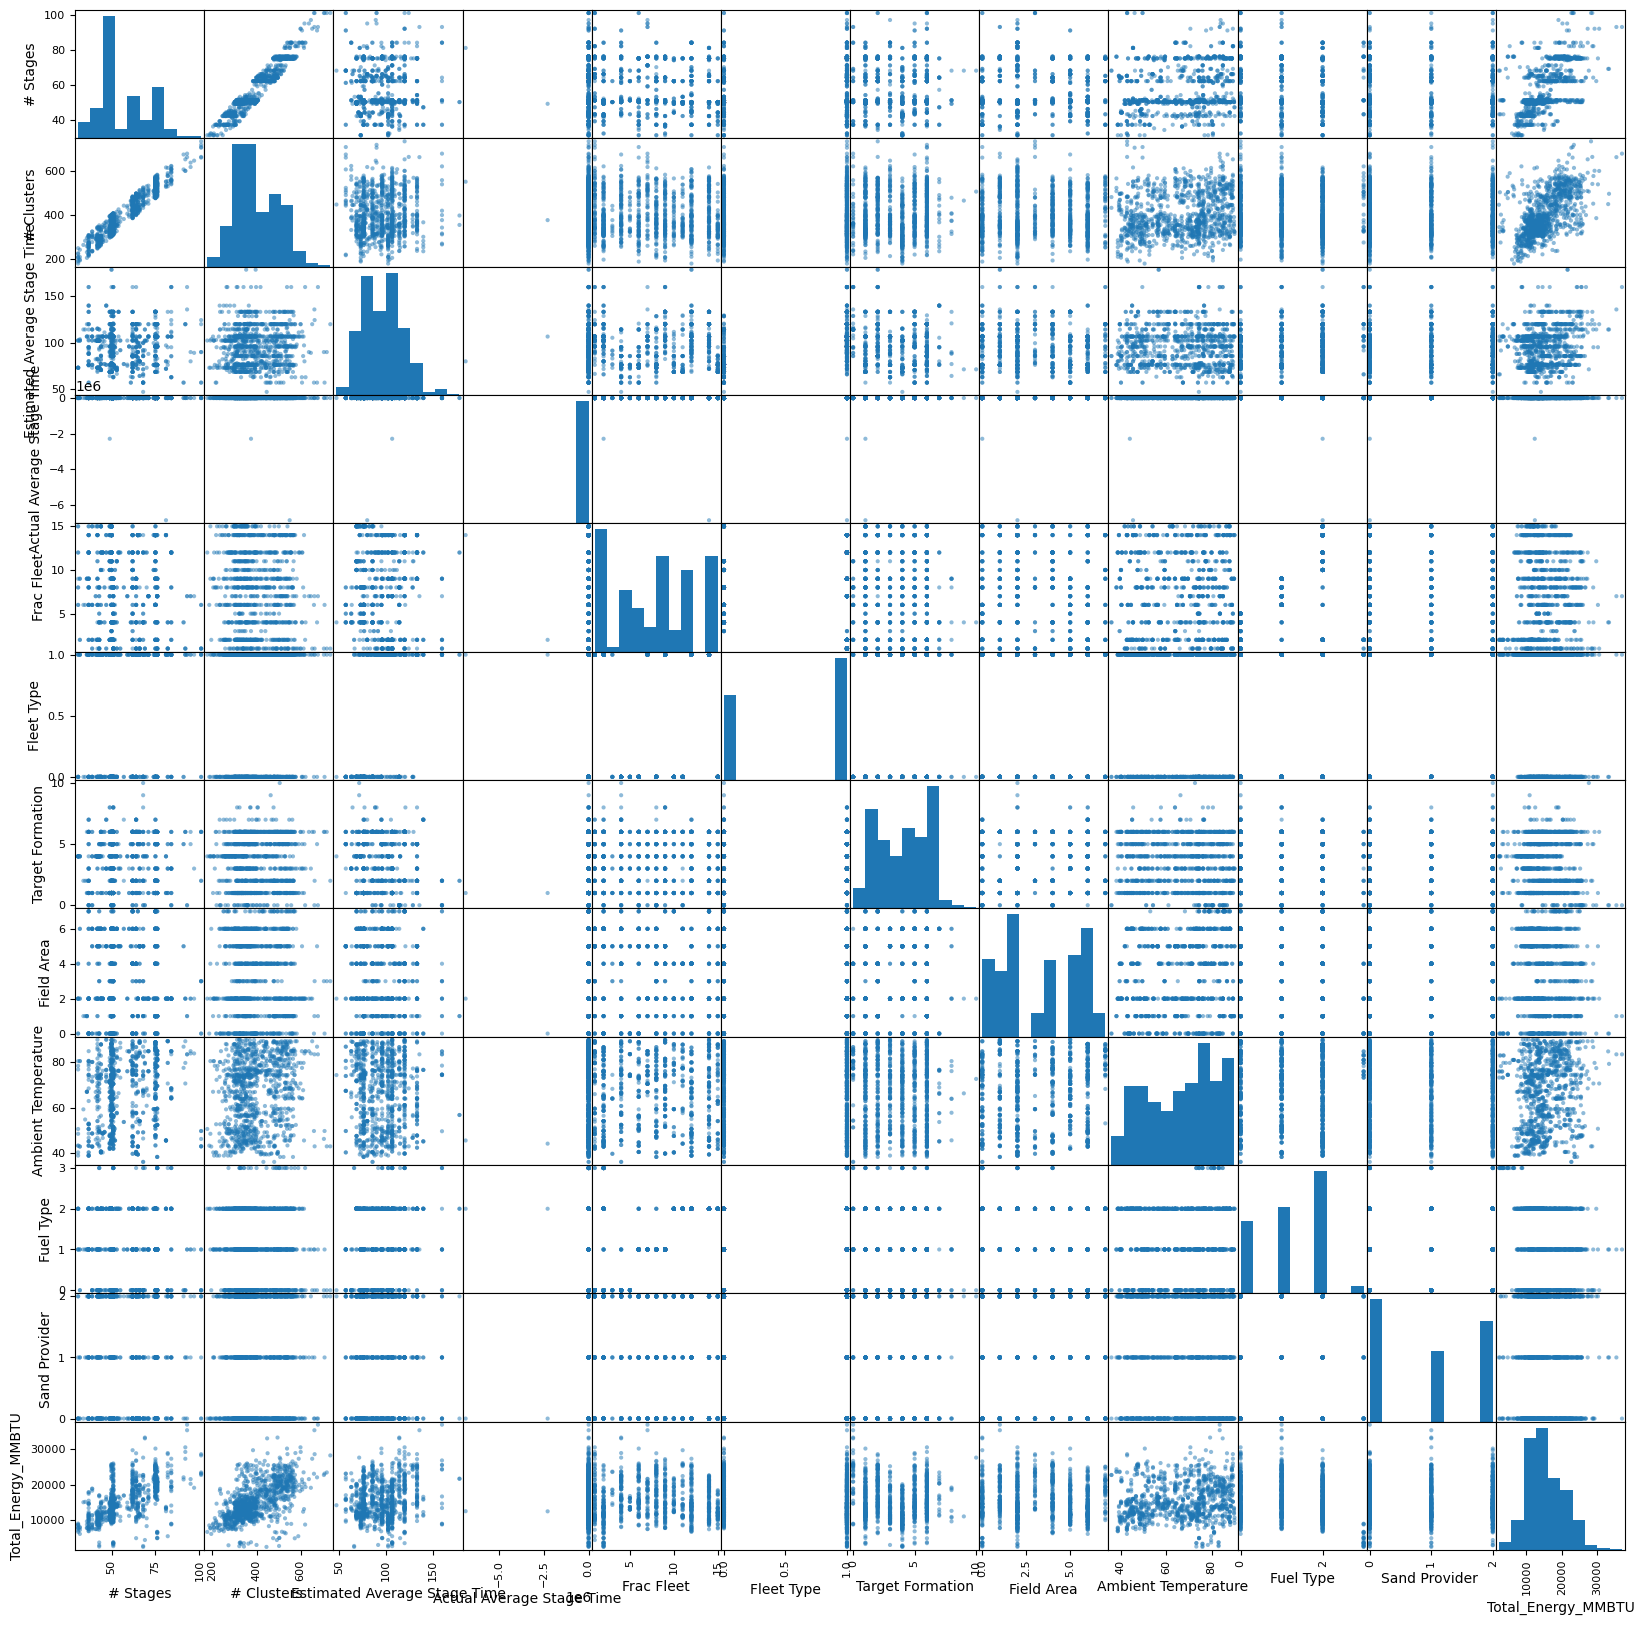

In [42]:


from pandas.plotting import scatter_matrix
plt.figure(figsize=(30,30))
scatter_matrix(my_data,figsize=(20,20))
plt.show()

$\large{\text{2) Mutual Information Analysis}} \newline \normalsize{\text{Determine the extent by which information can be derived from our target feature ('Total_Energy_MMBTU'),} \newline \normalsize{\text{by looking at each individual input feature, and therefore perform Feature Ranking}}}$

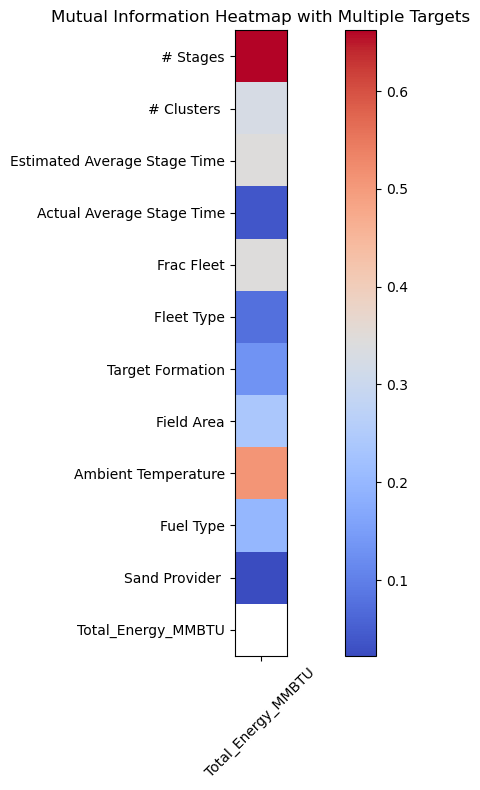

In [9]:
#from discord (changed enumerateddata --> mydata)

# Define the list of target columns (replace with your actual target columns)
target_columns = ['Total_Energy_MMBTU']  # Replace with your actual target columns

# Create an empty DataFrame to store the mutual information results
mi_matrix = pd.DataFrame(index=my_data.columns, columns=target_columns, dtype=float)

# For each feature, calculate mutual information with respect to each target column
for col in my_data.columns:
    if col not in target_columns:
        for target_col in target_columns:
            # Calculate mutual information between the feature and the target column
            mi_matrix.loc[col, target_col] = mutual_info_regression(my_data[[col]], np.ravel(my_data[target_col]))[0]

# Cap the values at 1 (for visualization purposes)
mi_matrix = np.clip(mi_matrix, 0, 1)

# Plot heatmap using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(mi_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Set x and y axis labels
plt.title("Mutual Information Heatmap with Multiple Targets")

# Set x and y axis labels (target columns on the x-axis, features on the y-axis)
plt.xticks(np.arange(len(target_columns)), target_columns, rotation=45, fontsize=10)
plt.yticks(np.arange(len(mi_matrix.index)), mi_matrix.index, fontsize=10)

plt.tight_layout()
plt.show()

In [10]:
my_data
x = my_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
y = my_data.iloc[:, [11]]
print(x)
print(y)

      # Stages  # Clusters   Estimated Average Stage Time  \
0         68.0        480.0                          85.7   
1         68.0        431.0                          85.7   
2         76.0        507.0                          76.2   
3         76.0        565.0                          76.2   
4         76.0        522.0                          76.2   
...        ...          ...                           ...   
1077      47.0        322.0                         106.7   
1078      42.0        312.0                         106.7   
1079      42.0        296.0                         106.7   
1080      47.0        322.0                         106.7   
1081      47.0        369.0                         106.7   

      Actual Average Stage Time  Frac Fleet  Fleet Type  Target Formation  \
0                         120.5         4.0         0.0               0.0   
1                         117.6         4.0         0.0               0.0   
2                          87.0     

Feature ranking:
1. feature # Stages = 1.000000
2. feature Ambient Temperature = 0.769525
3. feature Estimated Average Stage Time = 0.523682
4. feature Frac Fleet = 0.518742
5. feature # Clusters  = 0.493053
6. feature Field Area = 0.354026
7. feature Fuel Type = 0.297082
8. feature Target Formation = 0.197262
9. feature Fleet Type = 0.114347
10. feature Actual Average Stage Time = 0.057019
11. feature Sand Provider  = 0.038169


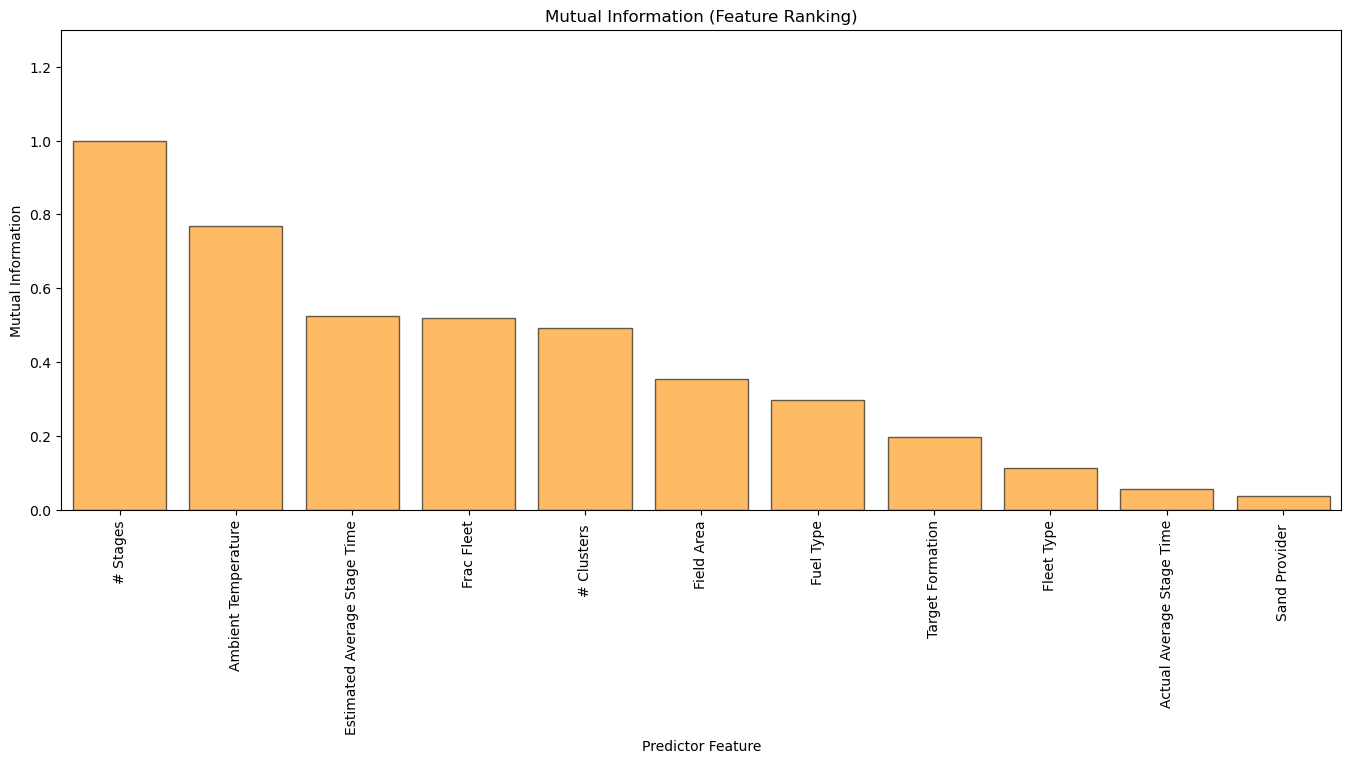

In [11]:
# https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Feature_Ranking.ipynb




mi = mutual_info_regression(x,np.ravel(y))              # calculate mutual information
mi /= np.max(mi)                                        # calculate relative mutual information

mi_orig = mi

indices = np.argsort(mi)[::-1]                          # find indicies for descending order

print("Feature ranking:")                               # write out the feature importances
for f in range(x.shape[1]):
    print("%d. feature %s = %f" % (f + 1, x.columns[indices][f], mi[indices[f]]))

plt.subplot(111)                                        # plot the relative mutual information 
plt.title("Mutual Information (Feature Ranking)")
plt.bar(range(x.shape[1]), mi[indices],edgecolor = 'black',
       color="darkorange",alpha=0.6,align="center")
plt.xticks(range(x.shape[1]), x.columns[indices],rotation=90)
plt.xlim([-0.5, x.shape[1]-0.5]); plt.ylim([0,1.3])
#plt.gca().yaxis.grid(True, which='major',linewidth = 1.0); plt.gca().yaxis.grid(True, which='minor',linewidth = 0.2) # add y grids
#plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
#plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks
plt.xlabel('Predictor Feature'); plt.ylabel('Mutual Information')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2., top=1., wspace=0.2, hspace=0.5)
plt.show()

$\normalsize{\text{the input feature that can be used to figure out the maximum amount of information about the target feature is scaled to '1'}}$

$\large{\text{3) Random Forest Regressor}} \newline \normalsize{\text{Decision trees track the MSE with inclusion of each input feature}}$

In [12]:
X = my_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
y = my_data.iloc[:, [11]]

In [13]:
# test train validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


####### we should also try using LOOCV to cerate validation dataset

def evaluate_model(model, X_train, y_train, cv=5):

    # Perform cross-validation for MAE and MSE
    mae_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="neg_mean_absolute_error")
    mse_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="neg_mean_squared_error")

    # Convert scores to positive values
    mae_scores = -mae_scores
    mse_scores = -mse_scores

    # Calculate mean metrics
    mean_mae = mae_scores.mean()
    mean_mse = mse_scores.mean()

    # Print results
    print("Model Evaluation Results")
    print(f"Mean Absolute Error per fold: {mae_scores}")
    print(f"Mean Squared Error per fold: {mse_scores}")
    print(f"Mean MAE: {mean_mae}")
    print(f"Mean MSE: {mean_mse}")
    
    # Return results as a dictionary
    #return {
    #    "MAE_per_fold": mae_scores,
    #    "MSE_per_fold": mse_scores,
    #    "Mean_MAE": mean_mae,
    #    "Mean_MSE": mean_mse
    #}



In [14]:
#Random forrest

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

#using testing statistics
evaluate_model(rf_regressor, X_train, y_train, cv=5)

C:\Users\denys\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\denys\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\denys\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\denys\AppData\Local\Progr

Model Evaluation Results
Mean Absolute Error per fold: [1333.84308273 1267.40021038 1263.21586787 1132.44225822 1304.52631566]
Mean Squared Error per fold: [3929354.07002123 3968573.71283388 3797114.34910281 2817775.36555271
 3742629.76953951]
Mean MAE: 1260.2855469740111
Mean MSE: 3651089.4534100294


In [15]:
# Assuming X is a pandas DataFrame
feature_names = X.columns  # Extract column names

# Get feature importances
importances = rf_regressor.feature_importances_

# Pair feature names with their importance scores
feature_importance = zip(feature_names, importances)

# Sort features by importance
sorted_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Print sorted feature importance with column names
print("Feature Importances:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
# Stages: 0.4241
Fuel Type: 0.1443
Estimated Average Stage Time: 0.1052
Target Formation: 0.0864
Ambient Temperature: 0.0586
Actual Average Stage Time: 0.0573
Fleet Type: 0.0516
Frac Fleet: 0.0288
# Clusters : 0.0232
Field Area: 0.0159
Sand Provider : 0.0045


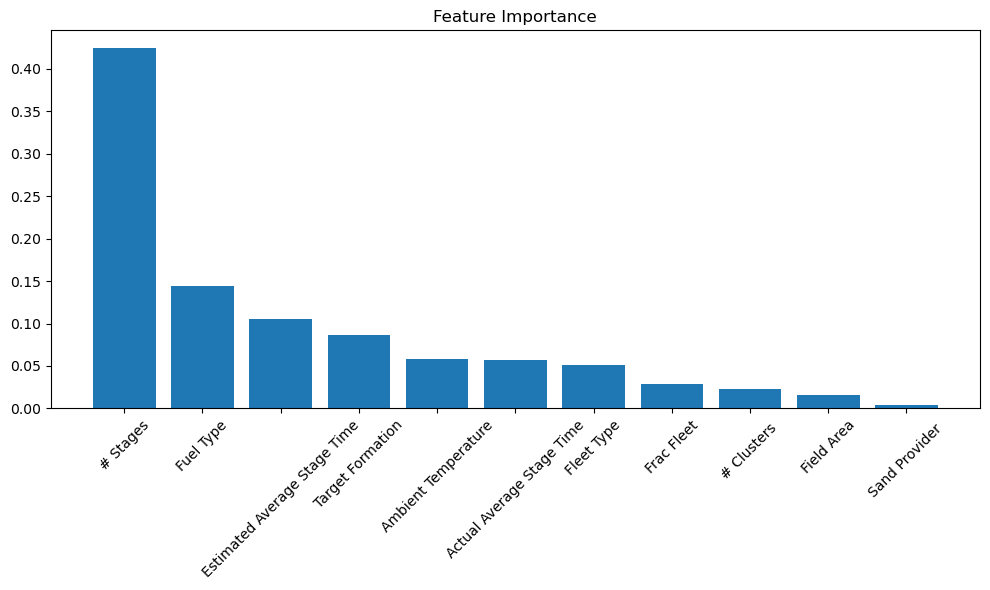

In [16]:
# Convert to numpy array for sorting
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


$\normalsize{\text{Further reinforces the conclusions made during the Mutual Information Analysis, that '#Stages' is more important than '#Clusters' and}} \newline \normalsize{\text{'Estimated Average' is more important than 'Actual Average', and since the two pairs are highly correlated, we have enough statistical justification to get rid of certain input features}}$

In [17]:
#box plot whiskers???

$\Large{\text{Conclusion:}} \newline \large{\text{With the help of the Pearson's Rank Correlation Coefficient and further reinforced by Mutual Information and Random Forest Regression analysis, we can - with reasonable confidence - }} \newline \large{\text{exclude '#Clusters' and 'Actual Average Stage Time' input features}}$

In [18]:
my_data

,# Stages,# Clusters,Estimated Average Stage Time,Actual Average Stage Time,Frac Fleet,Fleet Type,Target Formation,Field Area,Ambient Temperature,Fuel Type,Sand Provider,Total_Energy_MMBTU
0,68.0,480.0,85.7,120.5,4.0,0.0,0.0,0.0,35.900000,0.0,0.0,22717.0000
1,68.0,431.0,85.7,117.6,4.0,0.0,0.0,0.0,35.900000,0.0,1.0,22717.0000
2,76.0,507.0,76.2,87.0,8.0,0.0,1.0,1.0,38.100000,1.0,1.0,23719.0926
3,76.0,565.0,76.2,87.3,8.0,0.0,2.0,1.0,38.100000,1.0,2.0,23593.7562
4,76.0,522.0,76.2,90.8,8.0,0.0,6.0,1.0,38.100000,1.0,0.0,24359.3033
...,...,...,...,...,...,...,...,...,...,...,...,...
1077,47.0,322.0,106.7,118.2,14.0,1.0,3.0,5.0,90.100000,2.0,0.0,9881.1267
1078,42.0,312.0,106.7,118.1,14.0,1.0,3.0,5.0,90.100000,2.0,1.0,9016.3322
1079,42.0,296.0,106.7,118.2,14.0,1.0,3.0,5.0,81.766667,2.0,0.0,9138.3882
1080,47.0,322.0,106.7,117.7,14.0,1.0,3.0,5.0,90.100000,2.0,2.0,10596.5413


$\LARGE{\text{Machine Learning Procedure}} \newline \newline \large{\text{CatBoost Regressor, XGBoost Regressor, and Extra Tree Regressor were decided to be utilized for predicting the target feature 'Total_Energy_MMBTU', since these models performs very well with categorical data (that was enumerated) and doesn't require normalization}} \newline$ (Do we need to explain ourselves further about this?)

In [19]:
X = my_data.iloc[:, [0, 2, 4, 5, 6, 7, 8, 9, 10]]
y = my_data.iloc[:, [11]]
print(X.head(10))
print(y)

   # Stages  Estimated Average Stage Time  Frac Fleet  Fleet Type  \
0      68.0                     85.700000         4.0         0.0   
1      68.0                     85.700000         4.0         0.0   
2      76.0                     76.200000         8.0         0.0   
3      76.0                     76.200000         8.0         0.0   
4      76.0                     76.200000         8.0         0.0   
5      37.0                     88.000000        12.0         1.0   
6      31.0                    102.400000        12.0         1.0   
7      37.0                     94.933333        12.0         1.0   
8      37.0                     80.000000        12.0         1.0   
9      37.0                     75.400000        12.0         1.0   

   Target Formation  Field Area  Ambient Temperature  Fuel Type  \
0               0.0         0.0                 35.9        0.0   
1               0.0         0.0                 35.9        0.0   
2               1.0         1.0        

$\newline\newline\Large{\text{Preparing separate datasets for training phase and the testing phase of the models}}$

In [20]:

# test train validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train.head(10)


,# Stages,Estimated Average Stage Time,Frac Fleet,Fleet Type,Target Formation,Field Area,Ambient Temperature,Fuel Type,Sand Provider
816,50.0,120.0,12.0,1.0,5.0,4.0,80.0,2.0,2.0
237,37.0,80.0,12.0,1.0,5.0,2.0,50.5,2.0,1.0
621,39.0,73.1,6.0,0.0,4.0,5.0,73.6,1.0,0.0
630,51.0,106.7,1.0,1.0,6.0,6.0,73.7,0.0,0.0
275,76.0,76.2,4.0,0.0,1.0,1.0,52.3,0.0,0.0
306,75.0,133.3,14.0,1.0,5.0,2.0,54.3,2.0,2.0
593,50.0,68.6,15.0,0.0,1.0,0.0,71.9,2.0,2.0
344,50.0,85.7,4.0,0.0,2.0,4.0,56.8,0.0,2.0
855,53.0,70.7,11.0,0.0,6.0,6.0,82.2,2.0,0.0
1034,50.0,76.2,4.0,0.0,2.0,1.0,88.4,0.0,1.0


$\newline\newline\Large{\text{Preparing the method for Evaluation model}}$

In [21]:
####### we should also try using LOOCV to cerate validation dataset

def evaluate_model(model, X_train, y_train, cv=5):

    # Perform cross-validation for MAE and MSE
    mae_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="neg_mean_absolute_error")
    mse_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="neg_mean_squared_error")

    # Convert scores to positive values
    mae_scores = -mae_scores
    mse_scores = -mse_scores

    # Calculate mean metrics
    mean_mae = mae_scores.mean()
    mean_mse = mse_scores.mean()

    # Print results
    print("Model Evaluation Results")
    print(f"Mean Absolute Error per fold: {mae_scores}")
    print(f"Mean Squared Error per fold: {mse_scores}")
    print(f"Mean MAE: {mean_mae}")
    print(f"Mean MSE: {mean_mse}")
    
    # Return results as a dictionary
    #return {
    #    "MAE_per_fold": mae_scores,
    #    "MSE_per_fold": mse_scores,
    #    "Mean_MAE": mean_mae,
    #    "Mean_MSE": mean_mse
    #}

$\newline\newline\Large{\text{Applying the CatBoostRegressor model using the training datasets}}$

In [22]:
# Initialize CatBoost Regressor
cat_model = CatBoostRegressor(
    iterations=1000,           # Number of boosting iterations
    depth=6,                   # Depth of each tree
    learning_rate=0.1,         # Step size for boosting
    loss_function='RMSE',      ##### CHANGE THIS?###### Loss function (e.g., RMSE, MAE)
    verbose=200,               # Print training progress every 200 iterations
    random_seed=42             # Seed for reproducibility
)

# Train the model
cat_model.fit(X_train, y_train)

evaluate_model(cat_model, X_train, y_train, cv=5)

0:	learn: 5015.5972991	total: 101ms	remaining: 1m 41s
200:	learn: 1136.5931122	total: 814ms	remaining: 3.23s
400:	learn: 717.0884783	total: 1.5s	remaining: 2.25s
600:	learn: 522.8641290	total: 2.23s	remaining: 1.48s
800:	learn: 410.0726588	total: 2.95s	remaining: 734ms
999:	learn: 332.8014835	total: 3.67s	remaining: 0us
0:	learn: 5060.3433001	total: 4.74ms	remaining: 4.73s
200:	learn: 1029.3085003	total: 735ms	remaining: 2.92s
400:	learn: 638.7558959	total: 1.42s	remaining: 2.11s
600:	learn: 454.1405819	total: 2.13s	remaining: 1.41s
800:	learn: 340.7290363	total: 2.85s	remaining: 708ms
999:	learn: 263.8846508	total: 3.55s	remaining: 0us
0:	learn: 4956.2119461	total: 4.71ms	remaining: 4.7s
200:	learn: 1082.3744647	total: 693ms	remaining: 2.75s
400:	learn: 662.3231523	total: 1.4s	remaining: 2.09s
600:	learn: 469.0561039	total: 2.12s	remaining: 1.41s
800:	learn: 349.8523960	total: 2.85s	remaining: 708ms
999:	learn: 278.6763496	total: 3.55s	remaining: 0us
0:	learn: 5136.3533306	total: 3.65

$\newline \newline$

$\newline \newline$

$\Large{\text{Applying the Extra Tree model using the training datasets}}$

In [23]:
# Extra Trees
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_results = evaluate_model(et_model, X_train, y_train, cv=5)

C:\Users\denys\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\denys\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\denys\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\denys\AppData\Local\Progr

Model Evaluation Results
Mean Absolute Error per fold: [1242.60960616 1110.83668762 1205.8245391  1121.81458561 1217.34859326]
Mean Squared Error per fold: [3912356.74124401 3798557.4061493  4477090.70579618 3468441.81319427
 3367452.61601217]
Mean MAE: 1179.686802350543
Mean MSE: 3804779.8564791894


$\newline$

# Creating the XGBoost Model (The best preforming one)

In [85]:
import xgboost
from xgboost import XGBRegressor
from sklearn.base import BaseEstimator, RegressorMixin


xgb = XGBRegressor(max_depth=5, 
                   learning_rate=0.07,
                    n_estimators=500,
                    subsample=0.9,
                    colsample_bytree=0.7,
                    random_state = 42)

#Train the model
xgb.fit(X_train, y_train)

#Evaluate the model
evaluate_model(xgb, X_train, y_train, cv=5)
#y_predicted value
y_pred_xgb = xgb.predict(X_test)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [34]:
import pandas as pd

testingData = pd.read_csv("testing.csv") #We use this to replicate the format.. And ordering of testcases.
targetSolution = pd.DataFrame()

enumaratedTestingData = enumerateAndImpute("testing.csv", n_neighbors = 3)

X = enumaratedTestingData.iloc[:, [ 1, 3, 5, 6, 7, 8, 9, 13, 14]]
y = enumaratedTestingData["Total_Energy_MMBTU"]
#Enumerated data


machineModelOutput = cat_model.predict(X)

machineModelOutput

targetSolution.insert(0, 'Masked Well Name', testingData.iloc[:, 0])
targetSolution.insert(1, 'Fuel Type', testingData.iloc[:, 13])
targetSolution.insert(2, 'Fuel Value', machineModelOutput)




#our target solution now mirrors the format of the first three informational columns, with Fuel value ready for us to supplant.

#We must calculate the gas-diesel ratios... 


#We convert both to common units to be able to take a common proportion..
kwh_to_mmbtu = 0.003412
diesel_to_mmbtu = 0.1387

my_data2 = enumerateAndImpute("HackathonData2025.csv")

my_data2['Grid'] = my_data2['Grid'] * kwh_to_mmbtu
my_data2['Diesel'] = my_data2['Diesel'] * diesel_to_mmbtu
#my_data['CNG_MMBTU'] = my_data['CNG']

my_data2['Total_Energy_MMBTU'] = my_data2['Grid_'] + my_data2['Diesel'] + my_data2['CNG']
#df = df.drop(columns=['Grid_MMBTU', 'Diesel_MMBTU', 'CNG_MMBTU'])
#df.head()

#Take the average of proportions..
diesel_ratio = my_data2['Diesel'].sum() / my_data2['Total_Energy_MMBTU'].sum()
cng_ratio = my_data2['CNG'].sum() / my_data2['Total_Energy_MMBTU'].sum()

#We will use this ratio as a heuristical way to reconstruct the individual energy contributions of a hybrid system..

#Let's duplicate and distinguish test cases that use a hybrid gas-diesel system, using the ratio to calculate contribution.

# Iterate over each of the returned results from the model:

index = 0
new_rows = []  # Collect new rows here

while index < len(testingData):
    fuelType = testingData.at[index, "Fuel Type"]

    if fuelType == "DGB":
        # Duplicate the current row
        row_to_copy = targetSolution.iloc[index].copy()

        # Adjust the copied row for gas/diesel ratios
        diesel_row = row_to_copy.copy()
        diesel_row['Fuel Value'] *= diesel_ratio
        diesel_row['Fuel Type'] = "DGB_Diesel"

        cng_row = row_to_copy.copy()
        cng_row['Fuel Value'] *= cng_ratio
        cng_row['Fuel Type'] = "DGB_CNG"

        # Add new rows to the list
        new_rows.append(diesel_row)
        new_rows.append(cng_row)

    else:
        # Keep non-DGB rows
        new_rows.append(targetSolution.iloc[index])

    index += 1

# Create a new DataFrame with the updated rows
targetSolution = pd.DataFrame(new_rows)

# Save to CSV
targetSolution.to_csv("TEMPOR.csv", index=False)



# Load the solutionList file (replace with the actual file name)
solutionList = pd.read_csv("solution.csv")

# Ensure `targetSolution` and `solutionList` share the same columns for reordering
# Assuming `Masked Well Name` and `Fuel Type` are the key columns
key_columns = ['Masked Well Name', 'Fuel Type']

# Merge or reorder using the keys
targetSolution = targetSolution.set_index(key_columns)
solutionList = solutionList.set_index(key_columns)

# Reorder targetSolution based on the order of solutionList
targetSolution = targetSolution.loc[solutionList.index].reset_index()

# Conversion factors
mmbtu_to_kwh = 1 / 0.003412  # Convert MMBTU to kWh (for Grid values)
mmbtu_to_diesel = 1 / 0.1387  # Convert MMBTU to Diesel

# Loop through each row in the DataFrame
for index in range(len(targetSolution)):
    fuel_type = targetSolution.at[index, 'Fuel Type']
    fuel_value = targetSolution.at[index, 'Fuel Value']

    if fuel_type == "Grid":
        # Convert Grid values back to MWh
        targetSolution.at[index, 'Fuel Value'] = fuel_value * mmbtu_to_kwh
    elif fuel_type in ["DGB_Diesel", "Diesel"]:
        # Convert Diesel values back to their original units
        targetSolution.at[index, 'Fuel Value'] = fuel_value * mmbtu_to_diesel
    # No action needed for gas types (leave as is)



# Save the reordered DataFrame
targetSolution.to_csv("Reordered_TEMPOR.csv", index=False)



Empty columns before imputation: Index(['Actual Average Stage Time', 'Grid', 'Diesel', 'CNG'], dtype='object')
Done!
Empty columns before imputation: Index([], dtype='object')
Done!


In [69]:
# calculating the standart deviation for our uncenranty model

trainingDataSet = enumerateAndImpute("HackathonData2025.csv")

X = trainingDataSet.iloc[:, [ 1, 3, 5, 6, 7, 8, 9, 13, 14]]
y = trainingDataSet["Total_Energy_MMBTU"]



machineModelOutput = cat_model.predict(X) #Generate a series of predictions using the model on the training data set.

kwh_to_mmbtu = 0.003412
diesel_to_mmbtu = 0.1387

#Convert each column to MMBTU since the model also uses this common Unit.
trainingDataSet['Grid_MMBTU'] = trainingDataSet['Grid'] * kwh_to_mmbtu
trainingDataSet['Diesel_MMBTU'] = trainingDataSet['Diesel'] * diesel_to_mmbtu
trainingDataSet['CNG_MMBTU'] = trainingDataSet['CNG']

#Could be refactored into a seperate function..
trainingDataSet['Total_Energy_MMBTU'] = trainingDataSet['Grid_MMBTU'] + trainingDataSet['Diesel_MMBTU'] + trainingDataSet['CNG_MMBTU']

predictedValues = machineModelOutput #Convert to a numpy array for further processing
trueValues = trainingDataSet['Total_Energy_MMBTU'].to_numpy()



residuals = trueValues - predictedValues #Numpy allows subtraction of equal length arrays.



standardDevationOfResiduals = np.std(residuals)



real = np.random.normal(14000, standardDevationOfResiduals, 100)


column_names = [f'R_{i}' for i in range(1, 101)]  #Generate column names

for col in column_names:
    targetSolution[col] = np.nan


for row in range(len(targetSolution)):
    mmbtu_to_kwh = 1 / 0.003412  # Convert MMBTU to kWh (for Grid values)
    mmbtu_to_diesel = 1 / 0.1387  # Convert MMBTU to Diesel

    if fuel_type == "Grid": 
        targetSolution.iloc[row, 3:104] = np.maximum(np.random.normal(targetSolution.iloc[row, 2], standardDevationOfResiduals * mmbtu_to_kwh, 100), 0)

    elif fuel_type in ["DGB_Diesel", "Diesel"]:
        targetSolution.iloc[row, 3:104] = np.maximum(np.random.normal(targetSolution.iloc[row, 2], standardDevationOfResiduals *mmbtu_to_diesel, 100), 0)
    
targetSolution.to_csv("solution.csv", index=False)

Empty columns before imputation: Index([], dtype='object')
Done!
